In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(1, 'src/')
import utilities
import config
import csv

from fastai import *
from fastai.text import *

In [2]:
bs = 48

In [3]:
class_bunch = TextClasDataBunch.from_csv(path='.', csv_name='bunch_data.csv')

In [4]:
class_bunch.save('sarc_textlist_class')

/home/gaetano/anaconda3/envs/sarc/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CrossEntropyLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [5]:
class_bunch = load_data('.', 'sarc_textlist_class', bs=bs, num_workers=8)

In [6]:
class_bunch.show_batch()

text,target
xxbos ssbmrank 2016 : 11 - 15 - xxmaj name | xxmaj rank | xxmaj last xxmaj year | xxmaj change xxrep 7 - | xxrep 6 - | xxrep 10 - | xxrep 8 - xxmaj drunk xxmaj sloth | 100 | n / a | xxup new 4 % | 99 | n / a | xxup new xxmaj nightmare | 98 | n / a | xxup,0
"xxbos xxmaj after they face xxmaj hull this weekend , xxmaj southampton have an absolutely horrendous group of fixtures 9 xxmaj nov 2013 v xxmaj hull ( h ) * * 23 xxmaj nov 2013 v xxmaj arsenal ( a ) * * * * 1 xxmaj dec 2013 v xxmaj chelsea ( a ) * * 4 xxmaj dec 2013 v xxmaj aston xxmaj villa ( h ) *",1
xxbos ( xxup tw : xxmaj anime ) ( xxup tw : powerpoint ) xxmaj we can be rude to you but its just the internet so its totally fine - xxup fuck xxup you xxup you xxup fucking xxup shitlord xxup you xxup didnt xxup tell xxup me xxup xxunk xxup be xxup comic xxup sans xxrep 13 f xxup comic xxup sans xxup is a xxup trigger xxup,1
"xxbos xxmaj october 3 , 2016 - xxmaj clinton xxmaj won xxmaj debate ; xxmaj up xxmaj in xxmaj florida , xxmaj down xxmaj in xxmaj ohio , xxmaj on xxmaj plus xxmaj side xxmaj of xxmaj close xxmaj races xxmaj in xxmaj north xxmaj carolina , xxmaj pennsylvania , xxmaj quinnipiac xxmaj university xxmaj swing xxmaj state xxmaj poll xxmaj finds - i think the xxup pa number is",0
"xxbos xxmaj guys please be nice to the newcomers xxmaj dota 2 players xxmaj with the xxmaj reborn update coming this week we might see a lot of new players ( mainly lol players ) trying this game , please do n't be too much of a dick to them , this is our opportunity to make this game even bigger and even better , i know most of the",0


In [7]:
learn_c = text_classifier_learner(class_bunch, AWD_LSTM, drop_mult=0.3) #.to_fp16()
learn_c.load_encoder('fine_tuned_enc')
learn_c.freeze()

In [8]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


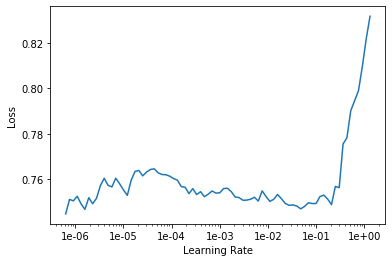

In [9]:
learn_c.recorder.plot()

In [10]:
learn_c.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.675601,0.668798,0.593014,04:13


In [11]:
learn_c.save('first')

In [12]:
learn_c.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (205664 items)
x: TextList
xxbos xxmaj trump calls for ' major investigation ' into voter fraud - xxmaj what a wonderful use of tax money,xxbos " xxmaj you are not the xxmaj puppet , you are not here to xxmaj give the xxmaj gift of salvation " - theory that foxy is god gay,xxbos xxmaj leivo still injured - " still injured ",xxbos xxmaj amazing xxmaj jackie xxmaj chan portrait made out of chopsticks - xxmaj name ten things that are n't xxmaj jackie xxmaj chan .,xxbos xxmaj yahoo switches xxmaj johnson 's - xxmaj man , i had no idea xxmaj will xxmaj johnson was such a xxunk asshat
y: CategoryList
1,1,0,0,1
Path: .;

Valid: LabelList (51417 items)
x: TextList
xxbos xxmaj and they say chivalry is dead . - xxmaj this should be nsfw,xxbos xxmaj obama insists xxup us ' will not be terrorized ' as xxup is hails attackers - xxmaj does anyone even listen to what comes out of this idiots mouth anymore ?,xxbos xxmaj what have been the pros and c

In [13]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.627200,0.624615,0.667211,05:45


In [14]:
learn_c.save('2nd')

In [15]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.593892,0.615603,0.676177,09:33


In [16]:
learn_c.save('3rd')

In [17]:
learn_c.unfreeze()
learn_c.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.585321,0.594282,0.676897,14:56
1,0.574527,0.595153,0.677908,14:32


In [18]:
learn_c.save('clas')